In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
print(tf.__version__)

2.6.0


In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import tensorflow.keras as keras
%matplotlib inline

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_image,train_label),(test_image,test_label) = fashion_mnist.load_data()

In [6]:
train_image.shape

(60000, 28, 28)

In [7]:
train_image = np.expand_dims(train_image,-1)
train_image.shape

(60000, 28, 28, 1)

In [8]:
test_image = np.expand_dims(test_image,-1)
test_image.shape

(10000, 28, 28, 1)

In [9]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(3,3),input_shape=train_image.shape[1:],activation='relu'))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [11]:
history = model.fit(
    train_image,
    train_label,
    epochs=1,
    validation_data = (test_image,test_label))

1875/1875 [==============================] - 353s 185ms/step - loss: 0.8881 - acc: 0.6607 - val_loss: 0.4805 - val_acc: 0.8211


In [12]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [13]:
history.history

{'loss': [0.8881331086158752],
 'acc': [0.6606666445732117],
 'val_loss': [0.48053377866744995],
 'val_acc': [0.8210999965667725]}

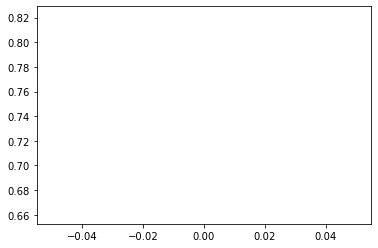

In [14]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label ='val_acc')

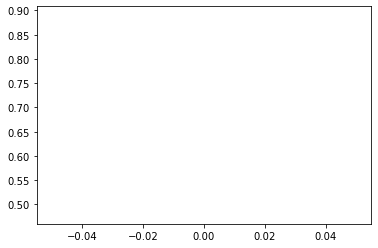

In [15]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label ='val_loss')